

# Random Forest on titanic dataset

### 1. Problem Statement

The goal is to __predict survival__ of passengers travelling in RMS __Titanic__ using __Logistic regression__.

<a id=section2></a>

### 2. Data Loading and Description

<a id=section201></a>

- The dataset consists of the information about people boarding the famous RMS Titanic. Various variables present in the dataset includes data of age, sex, fare, ticket etc. 
- The dataset comprises of __891 observations of 12 columns__. Below is a table showing names of all the columns and their description.

| Column Name   | Description                                               |
| ------------- |:-------------                                            :| 
| PassengerId   | Passenger Identity                                        | 
| Survived      | Whether passenger survived or not                         |  
| Pclass        | Class of ticket                                           | 
| Name          | Name of passenger                                         |   
| Sex           | Sex of passenger                                          |
| Age           | Age of passenger                                          |
| SibSp         | Number of sibling and/or spouse travelling with passenger |
| Parch         | Number of parent and/or children travelling with passenger|
| Ticket        | Ticket number                                             |
| Fare          | Price of ticket                                           |
| Cabin         | Cabin number                                              |
| Embarked      | Port of embarkation                                       |

#### Importing packages                                          

In [5]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
#import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()


In [6]:
import warnings
warnings.filterwarnings('ignore')


pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
#pd.reset_option('^display.', silent=True)

#### Importing the Dataset

In [8]:
data = pd.read_csv('titanic_data.csv')

In [9]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
final_col = ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age',
       'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

In [11]:
data = data[final_col]

In [12]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


| Column Name   | Description                                               |
| ------------- |:-------------                                            :| 
| PassengerId   | Passenger Identity                                        | 
| Survived      | Whether passenger survived or not                         |  
| Pclass        | Class of ticket                                           | 
| Name          | Name of passenger                                         |   
| Sex           | Sex of passenger                                          |
| Age           | Age of passenger                                          |
| SibSp         | Number of sibling and/or spouse travelling with passenger |
| Parch         | Number of parent and/or children travelling with passenger|
| Ticket        | Ticket number                                             |
| Fare          | Price of ticket                                           |
| Cabin         | Cabin number                                              |
| Embarked      | Port of embarkation                                       |

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<a id=section3></a>

## 3. Preprocessing the data

- Dealing with missing values<br/>
    - Dropping/Replacing missing entries of __Embarked.__
    - Replacing missing values of __Age__ and __Fare__ with median values.
    - Dropping the column __'Cabin'__ as it has too many _null_ values.

In [14]:
# Finding the distribution of Embarked across unique values
data.groupby(['Embarked'])['Embarked'].count()

Embarked
C    168
Q     77
S    644
Name: Embarked, dtype: int64

In [15]:
data.Embarked.mode()

0    S
dtype: object

In [16]:
# Finding the mode of Embarked
data['Embarked'].mode()[0]

'S'

In [17]:
# Filling Null values of Embarked with its mode
data.Embarked = data.Embarked.fillna(data['Embarked'].mode())

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [19]:
data.Age.fillna(data.Age.median(), inplace = True)
data.Fare.fillna(data.Fare.median(), inplace = True)

In [20]:
data.drop('Cabin', axis = 1,inplace = True)

In [21]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [22]:
# Creating a new feature/column : "Family Size". By adding the number of children and parents
data['FamilySize'] = data['SibSp'] + data['Parch']+1

In [23]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


- __Dropping__ columns __'Name' , 'Ticket'  , 'SibSp' , 'PassengerId' and 'Parch'__ 

In [24]:
drop_cols = ['Name','Ticket','SibSp','Parch','PassengerId']

In [25]:
data.drop(drop_cols, axis = 1, inplace=True)
data.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,0,3,male,22.0,7.2500,S,2
1,1,1,female,38.0,71.2833,C,2
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,2
4,0,3,male,35.0,8.0500,S,1
5,0,3,male,28.0,8.4583,Q,1
6,0,1,male,54.0,51.8625,S,1
7,0,3,male,2.0,21.0750,S,5
8,1,3,female,27.0,11.1333,S,3
9,1,2,female,14.0,30.0708,C,2


## EDA

In [26]:
# how many people survived
data['Survived'].sum()

342

In [27]:
data.shape[0]

891

In [28]:
# % of people survived
data['Survived'].sum()/data.shape[0]

0.3838383838383838

In [29]:
# what is the distribution of male and female
data.groupby(['Sex'])['Sex'].count().sort_values(ascending=False)#.plot('bar')

Sex
male      577
female    314
Name: Sex, dtype: int64

In [30]:
# From where did the people embark
data.groupby(['Embarked'])['Embarked'].count().sort_values(ascending=False)

Embarked
S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [31]:
# How many people stayed in each of the classes
data.groupby(['Pclass'])['Pclass'].count().sort_values(ascending=False)

Pclass
3    491
1    216
2    184
Name: Pclass, dtype: int64

In [32]:
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,0,3,male,22.0,7.2500,S,2
1,1,1,female,38.0,71.2833,C,2
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,2
4,0,3,male,35.0,8.0500,S,1


In [33]:
data.groupby(['Embarked'])['Survived'].sum().sort_values(ascending=False)

Embarked
S    217
C     93
Q     30
Name: Survived, dtype: int64

In [34]:
data.groupby(['Embarked'])['Survived'].count()

Embarked
C    168
Q     77
S    644
Name: Survived, dtype: int64

In [35]:
data.FamilySize.sum()

1697

<AxesSubplot:xlabel='Embarked'>

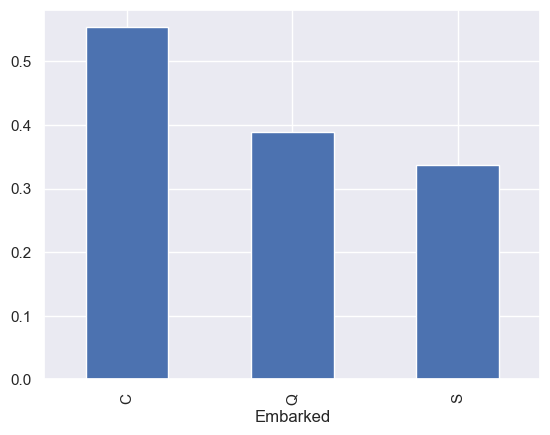

In [36]:
(data.groupby(['Embarked'])['Survived'].sum()/data.groupby(['Embarked'])['Survived'].count()).plot(kind ='bar')

In [37]:
data.groupby(['Pclass'])['Survived'].sum()

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Pclass'>

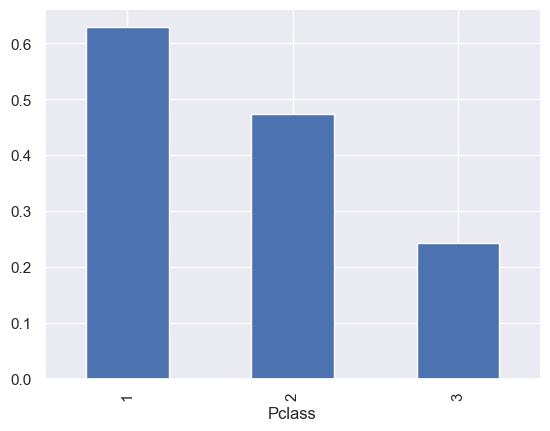

In [38]:
(data.groupby(['Pclass'])['Survived'].sum()/data.groupby(['Pclass'])['Survived'].count()).plot(kind='bar')

In [39]:
data['Fare'].mean()

32.204207968574636

In [40]:
#data['combination'] = data['Embarked'].astype(str) + '-' + data['Pclass'].astype(str)

In [41]:
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,0,3,male,22.0,7.2500,S,2
1,1,1,female,38.0,71.2833,C,2
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,2
4,0,3,male,35.0,8.0500,S,1


In [42]:
data.groupby(['Survived'])['Fare'].mean()

Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64

In [43]:
data.groupby(['Survived'])['Age'].mean()

Survived
0    30.028233
1    28.291433
Name: Age, dtype: float64

Drawing __pair plot__ to know the joint relationship between __'Fare' , 'Age' , 'Pclass' & 'Survived'__

Text(0.5, 1.0, 'Pair Plot')

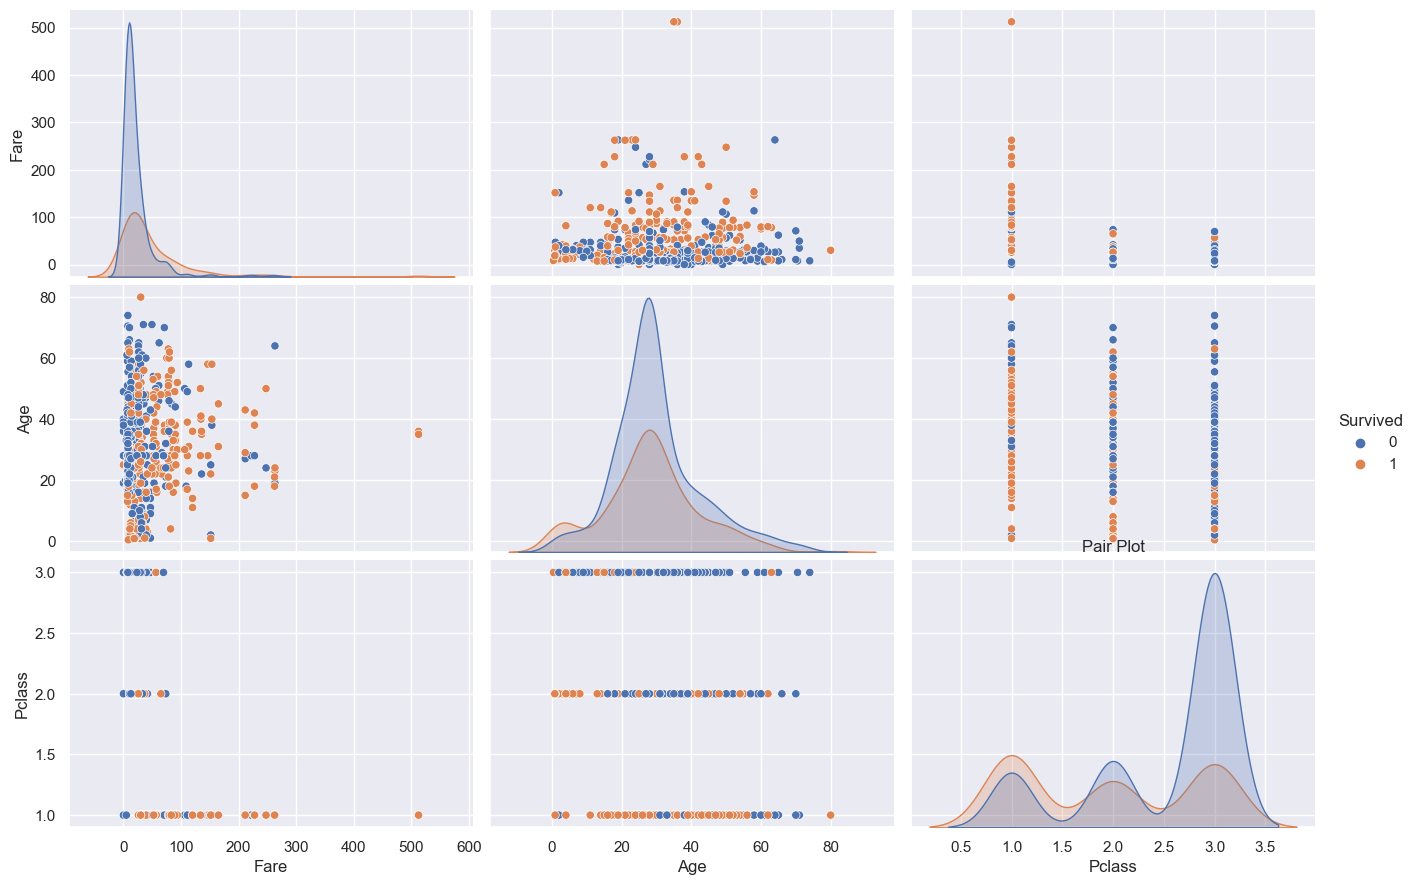

In [44]:
sns.pairplot(data[["Fare","Age","Pclass","Survived"]],vars = ["Fare","Age","Pclass"],\
                                                             hue="Survived", dropna=True, height = 3, aspect = 1.5)
plt.title('Pair Plot')

Observing the diagonal elements,
- More people of __Pclass 1__ _survived_ than died (First peak of red is higher than blue)
- More people of __Pclass 3__ _died_ than survived (Third peak of blue is higher than red)
- More people of age group __20-40 died__ than survived.
- Most of the people paying __less fare died__.

# Creating dummy variables for our categorical variables

In [45]:
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,0,3,male,22.0,7.2500,S,2
1,1,1,female,38.0,71.2833,C,2
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,2
4,0,3,male,35.0,8.0500,S,1


In [46]:
cat_cols = ['Sex','Embarked']

In [47]:
data_with_dummies = pd.get_dummies(data, columns=cat_cols, drop_first=True)

In [48]:
data_with_dummies.head()

,Survived,Pclass,Age,Fare,FamilySize,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,7.2500,2,1,0,1
1,1,1,38.0,71.2833,2,0,0,0
2,1,3,26.0,7.9250,1,0,0,1
3,1,1,35.0,53.1000,2,0,0,1
4,0,3,35.0,8.0500,1,1,0,1


Establishing __coorelation__ between all the features using __heatmap__.

Text(0.5, 1.0, 'Correlation between features')

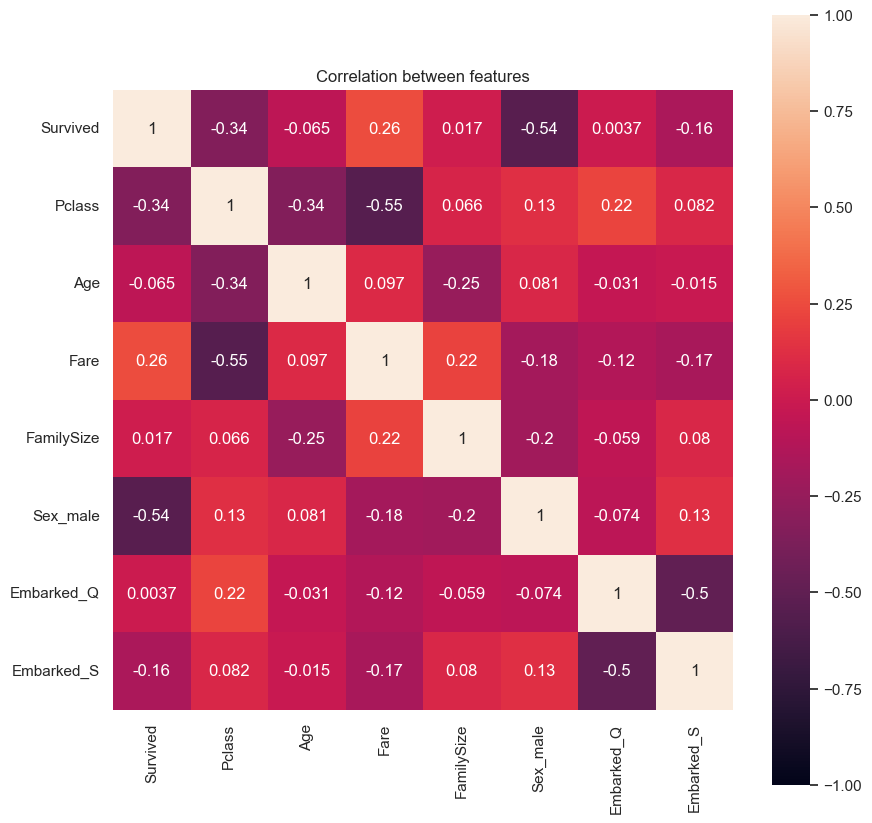

In [49]:
corr = data_with_dummies.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, square = True, annot = True,vmin=-1, vmax=1) #  vmin=-1, vmax=1
plt.title('Correlation between features')

- __Age and Pclass are negatively corelated with Survived.__
- __Fare and FamilySize__ are __positively coorelated with Survived.__

<a id=section4></a>

## 4. Data Preparation for Model Training

<a id=section401></a>

## 4.1 Preparing X and y using pandas

In [50]:
data_with_dummies.head()

,Survived,Pclass,Age,Fare,FamilySize,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,7.2500,2,1,0,1
1,1,1,38.0,71.2833,2,0,0,0
2,1,3,26.0,7.9250,1,0,0,1
3,1,1,35.0,53.1000,2,0,0,1
4,0,3,35.0,8.0500,1,1,0,1


In [51]:
data_with_dummies.columns

Index(['Survived', 'Pclass', 'Age', 'Fare', 'FamilySize', 'Sex_male',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [52]:
features = ['Pclass', 'Age', 'Fare', 'FamilySize', 'Sex_male','Embarked_Q', 'Embarked_S']

target = ['Survived']

In [53]:
X = data_with_dummies[features]
y = data_with_dummies[target]

<a id=section405></a>

<a id=section402></a>

## 4.2 Splitting X and y into training and test datasets

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [55]:
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (712, 7)
y_train shape:  (712, 1)

Test cases as below
X_test shape:  (179, 7)
y_test shape:  (179, 1)


<a id=section5></a>

## 5. LOGISTIC REGRESSION

<a id=section501></a>

## 5.1 Logistic regression in scikit-learn

In [56]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

<a id=section502></a>

## 5.2 Using the Model for Prediction

In [57]:
y_pred_train_lr = logreg.predict(X_train)  

In [58]:
y_pred_test_lr = logreg.predict(X_test)                 # make predictions on the testing set

In [59]:
probabilities_lr = logreg.predict_proba(X_test)

In [60]:
probabilities_1 = probabilities_lr[:,1]
probabilities_0 = probabilities_lr[:,0]

<a id = section503></a>

## 5.3 Model evaluation for Logistic Regression

### Model Evaluation using __accuracy classification score__

In [61]:
from sklearn.metrics import accuracy_score
accuracy_train_lr = accuracy_score(y_train,y_pred_train_lr)
accuracy_test_lr = accuracy_score(y_test,y_pred_test_lr)
print('Accuracy score for train data is:', accuracy_train_lr)
print('Accuracy score for test data is:', accuracy_test_lr)

Accuracy score for train data is: 0.800561797752809
Accuracy score for test data is: 0.7932960893854749


In [62]:
from sklearn.metrics import confusion_matrix
c_matrix_train_lr = pd.DataFrame(confusion_matrix(y_train, y_pred_train_lr))
c_matrix_train_lr.index = ['Actual Died','Actual Survived']
c_matrix_train_lr.columns = ['Predicted Died','Predicted Survived']
print("Confusion Matrix for LR for Train set\n",c_matrix_train_lr)

Confusion Matrix for LR for Train set
                  Predicted Died  Predicted Survived
Actual Died                 378                  65
Actual Survived              77                 192


This means 387 + 185 = __572 correct predictions__ & 84 + 56 = __140 false predictions__.

In [63]:
c_matrix_test_lr = pd.DataFrame(confusion_matrix(y_test, y_pred_test_lr))
c_matrix_test_lr.index = ['Actual Died','Actual Survived']
c_matrix_test_lr.columns = ['Predicted Died','Predicted Survived']
print("Confusion Matrix for LR for test set\n",c_matrix_test_lr)

Confusion Matrix for LR for test set
                  Predicted Died  Predicted Survived
Actual Died                  89                  17
Actual Survived              20                  53


This means 93 + 50 = __143 correct predictions__ & 23 + 13 = __36 false predictions__.

<a id = section6></a>

## 6 Decision Tree

<a id = section601></a>

## 6.1 Decision Tree in scikit-learn

In [64]:
from sklearn import tree
model_dt = tree.DecisionTreeClassifier(random_state = 0)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

<a id=section602></a>

## 6.2 Using the Model for Prediction

In [65]:
y_pred_train_dt = model_dt.predict(X_train) 
y_pred_test_dt = model_dt.predict(X_test) 

- Now lets see some model evaluation techniques.

<a id = section603></a>

## 6.3 Model evaluation for Decision Tree

### Model Evaluation using __accuracy_score__

In [66]:
#from sklearn.metrics import accuracy_score
accuracy_train_dt = accuracy_score(y_train,y_pred_train_dt)
accuracy_test_dt = accuracy_score(y_test,y_pred_test_dt)
print('Accuracy score for train data for DT is:', accuracy_train_dt)
print('Accuracy score for test data for DT is:', accuracy_test_dt)

Accuracy score for train data for DT is: 0.9873595505617978
Accuracy score for test data for DT is: 0.7486033519553073


### Model Evaluation using confusion matrix

In [67]:
c_matrix_train_dt = pd.DataFrame(confusion_matrix(y_train, y_pred_train_dt))
c_matrix_train_dt.index = ['Actual Died','Actual Survived']
c_matrix_train_dt.columns = ['Predicted Died','Predicted Survived']
print("Confusion Mateix for DT for Train set\n",c_matrix_train_dt)

Confusion Mateix for DT for Train set
                  Predicted Died  Predicted Survived
Actual Died                 442                   1
Actual Survived               8                 261


This means 442 + 261 = __703 correct predictions__ & 8 + 1 = __9 false predictions__.

In [68]:
c_matrix_test_dt = pd.DataFrame(confusion_matrix(y_test, y_pred_test_dt))
c_matrix_test_dt.index = ['Actual Died','Actual Survived']
c_matrix_test_dt.columns = ['Predicted Died','Predicted Survived']
print("Confusion Mateix for DT for test set\n",c_matrix_test_dt)

Confusion Mateix for DT for test set
                  Predicted Died  Predicted Survived
Actual Died                  87                  19
Actual Survived              26                  47


This means 87 + 47 = __134 correct predictions__ & 26 + 19 = __45 false predictions__.

## Hyperparameters Tuning for DT using GridSearch

In [69]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier(random_state = 0)


tree_para = [{'criterion':['gini','entropy'],'max_depth': range(2,60),
                             'max_features': ['sqrt', 'log2', None] }]
                            
model_dt_tuned = GridSearchCV(decision_tree_classifier,tree_para)


In [70]:
model_dt_tuned.get_params

<bound method BaseEstimator.get_params of GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 60),
                          'max_features': ['sqrt', 'log2', None]}])>

In [72]:
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,0,3,male,22.0,7.2500,S,2
1,1,1,female,38.0,71.2833,C,2
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,2
4,0,3,male,35.0,8.0500,S,1


In [73]:
X_train.head()

,Pclass,Age,Fare,FamilySize,Sex_male,Embarked_Q,Embarked_S
301,3,28.0,23.2500,3,1,1,0
309,1,30.0,56.9292,1,0,0,0
516,2,34.0,10.5000,1,0,0,1
120,2,21.0,73.5000,3,1,0,1
570,2,62.0,10.5000,1,1,0,1


In [74]:
model_dt_tuned.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 60),
                          'max_features': ['sqrt', 'log2', None]}])

- Using the model for __prediction__

In [75]:
y_pred_test_dt_tuned = model_dt_tuned.predict(X_test)
y_pred_train_dt_tuned = model_dt_tuned.predict(X_train)

- __Model Evaluation__ using __accuracy_score__

In [76]:
from sklearn.metrics import accuracy_score
accuracy_train_dt_tuned = accuracy_score(y_train,y_pred_train_dt_tuned)
accuracy_test_dt_tuned = accuracy_score(y_test,y_pred_test_dt_tuned)
print('Accuracy score for train data is:', accuracy_train_dt_tuned)
print('Accuracy score for test data is:', accuracy_test_dt_tuned)

Accuracy score for train data is: 0.8441011235955056
Accuracy score for test data is: 0.8044692737430168


- __Model Evaluation__ using __confusion matrix__

In [77]:
#from sklearn.metrics import confusion_matrix

c_matrix_train_dt_tuned = pd.DataFrame(confusion_matrix(y_train, y_pred_train_dt_tuned))

c_matrix_train_dt_tuned.index = ['Actual Died','Actual Survived']
c_matrix_train_dt_tuned.columns = ['Predicted Died','Predicted Survived']
print(c_matrix_train_dt_tuned)

                 Predicted Died  Predicted Survived
Actual Died                 399                  44
Actual Survived              67                 202


In [78]:
from sklearn.metrics import confusion_matrix

c_matrix_test_dt_tuned = pd.DataFrame(confusion_matrix(y_test, y_pred_test_dt_tuned))

c_matrix_test_dt_tuned.index = ['Actual Died','Actual Survived']
c_matrix_test_dt_tuned.columns = ['Predicted Died','Predicted Survived']
print(c_matrix_test_dt_tuned)

                 Predicted Died  Predicted Survived
Actual Died                  95                  11
Actual Survived              24                  49


You can see 95 + 49 = __144 correct predictions__ & 24 + 11 = __35 false predictions__.

__Observations:__

- __With gridsearch__ *accuracy_score* __increased__ to __0.804__ and the __number of correct predictions increased to 144__ and number of false predictions __decreased__ to __35__. 

<a id = section7></a>

## 7 Random Forest

<a id = section701></a>

## 7.1 Random Forest in scikit-learn

- __Model without parameter specification__

In [79]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(random_state = 0)

model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

<a id=section702></a>

## 7.2 Using the Model for Prediction

In [80]:
y_pred_train_rf = model_rf.predict(X_train) 
y_pred_test_rf = model_rf.predict(X_test) 

- Now lets see some model evaluation techniques.

<a id = section703></a>

## 7.3 Model evaluation for Random Forest

### Model Evaluation using __accuracy_score__

In [81]:
#from sklearn.metrics import accuracy_score
accuracy_train_rf = accuracy_score(y_train,y_pred_train_rf)
accuracy_test_rf = accuracy_score(y_test,y_pred_test_rf)
print('Accuracy score for train data for DT is:', accuracy_train_rf)
print('Accuracy score for test data for DT is:', accuracy_test_rf)

Accuracy score for train data for DT is: 0.9873595505617978
Accuracy score for test data for DT is: 0.776536312849162


### Model Evaluation using confusion matrix

In [82]:
c_matrix_train_rf = pd.DataFrame(confusion_matrix(y_train, y_pred_train_rf))
c_matrix_train_rf.index = ['Actual Died','Actual Survived']
c_matrix_train_rf.columns = ['Predicted Died','Predicted Survived']
print("Confusion Mateix for DT for Train set\n",c_matrix_train_rf)

Confusion Mateix for DT for Train set
                  Predicted Died  Predicted Survived
Actual Died                 438                   5
Actual Survived               4                 265


This means 438 + 265 = __703 correct predictions__ & 4 + 5 = __9 false predictions__.

In [83]:
c_matrix_test_rf = pd.DataFrame(confusion_matrix(y_test, y_pred_test_rf))
c_matrix_test_rf.index = ['Actual Died','Actual Survived']
c_matrix_test_rf.columns = ['Predicted Died','Predicted Survived']
print("Confusion Mateix for DT for test set\n",c_matrix_test_rf)

Confusion Mateix for DT for test set
                  Predicted Died  Predicted Survived
Actual Died                  94                  12
Actual Survived              28                  45


This means 94 + 45 = __139 correct predictions__ & 28 + 12 = __40 false predictions__.

### Hyper parameter for RF tuning using RANDOM SEARCH

In [84]:
from sklearn.model_selection import RandomizedSearchCV
# parameters for RandomSearchCV
param_dist = {"max_depth": range(2,6),
              "min_samples_split": range(6, 11),
              "min_samples_leaf": range(1, 5),
              "bootstrap": [True,False],
              "n_estimators": [100, 400],
              "criterion" : ["gini", "entropy"],
              'max_features': ['sqrt', 'log2',5]
             }
# run randomized search
n_iter_search = 100
model_rf_tuned = RandomizedSearchCV(model_rf, param_distributions = param_dist,
                                   n_iter = n_iter_search,
                                   n_jobs = -1)

In [85]:
model_rf_tuned.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(random_state=0), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': range(2, 6),
                                        'max_features': ['sqrt', 'log2', 5],
                                        'min_samples_leaf': range(1, 5),
                                        'min_samples_split': range(6, 11),
                                        'n_estimators': [100, 400]})

In [86]:
model_rf_tuned.best_params_

{'n_estimators': 100,
 'min_samples_split': 7,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 5,
 'criterion': 'gini',
 'bootstrap': True}

- Using the model for __prediction__

In [87]:
y_pred_test_rf_tuned = model_rf_tuned.predict(X_test)
y_pred_train_rf_tuned = model_rf_tuned.predict(X_train)

- __Model Evaluation__ using __accuracy_score__

In [88]:
from sklearn.metrics import accuracy_score
accuracy_train_rf_tuned = accuracy_score(y_train,y_pred_train_rf_tuned)
accuracy_test_rf_tuned = accuracy_score(y_test,y_pred_test_rf_tuned)
print('Accuracy score for train data is:', accuracy_train_rf_tuned)
print('Accuracy score for test data is:', accuracy_test_rf_tuned)

Accuracy score for train data is: 0.8595505617977528
Accuracy score for test data is: 0.776536312849162


- __Model Evaluation__ using __confusion matrix__

In [89]:
#from sklearn.metrics import confusion_matrix

c_matrix_train_rf_tuned = pd.DataFrame(confusion_matrix(y_train, y_pred_train_rf_tuned))

c_matrix_train_rf_tuned.index = ['Actual Died','Actual Survived']
c_matrix_train_rf_tuned.columns = ['Predicted Died','Predicted Survived']
print(c_matrix_train_rf_tuned)

                 Predicted Died  Predicted Survived
Actual Died                 426                  17
Actual Survived              83                 186


In [90]:
from sklearn.metrics import confusion_matrix

c_matrix_test_rf_tuned = pd.DataFrame(confusion_matrix(y_test, y_pred_test_rf_tuned))

c_matrix_test_rf_tuned.index = ['Actual Died','Actual Survived']
c_matrix_test_rf_tuned.columns = ['Predicted Died','Predicted Survived']
print(c_matrix_test_rf_tuned)

                 Predicted Died  Predicted Survived
Actual Died                 100                   6
Actual Survived              34                  39


You can see 99 + 39 = __138 correct predictions__ & 34 + 7 = __41 false predictions__.

__Observations:__

- __With random search__ *accuracy_score* __increased__ to __0.776__ and the __number of correct predictions increased to 139__ and number of false predictions __decreased__ to __40__. 

<a id = section8></a>

## 8. Comparing Models

<a id = section801></a>

## 8.1 DT Vs LR Vs RF

In [91]:
# All Accuracy scores
print("LOGISTIC REGRESSION")
print("Accuracy of LR on Train:", accuracy_train_lr)
print("Accuracy of LR on Test:", accuracy_test_lr)

print("\nDT WITH Hyperparameter tuning:")
print("Accuracy of DT on Train:", accuracy_train_dt_tuned)
print("Accuracy of DT on Test:", accuracy_test_dt_tuned)

print("\nRANDOM FOREST With Tuning")
print("Accuracy of RF on Train:", accuracy_train_rf_tuned)
print("Accuracy of RF on Test:", accuracy_test_rf_tuned)

LOGISTIC REGRESSION
Accuracy of LR on Train: 0.800561797752809
Accuracy of LR on Test: 0.7932960893854749

DT WITH Hyperparameter tuning:
Accuracy of DT on Train: 0.8441011235955056
Accuracy of DT on Test: 0.8044692737430168

RANDOM FOREST With Tuning
Accuracy of RF on Train: 0.8595505617977528
Accuracy of RF on Test: 0.776536312849162


In [92]:
# All Confusion Matrix
print("Confusion Matrix for LR on Train Set:\n", c_matrix_train_lr,"\n")
print("Confusion Matrix for LR on Test Set:\n", c_matrix_test_lr,"\n\n\n")

print("Confusion Matrix for DT TUNED on Train Set:\n", c_matrix_train_dt_tuned)
print("Confusion Matrix for DT TUNED on Test Set:\n", c_matrix_test_dt_tuned,"\n\n\n")

print("Confusion Matrix for RF TUNED on Train Set:\n", c_matrix_train_rf_tuned)
print("Confusion Matrix for RF TUNED on Test Set:\n", c_matrix_test_rf_tuned)

Confusion Matrix for LR on Train Set:
                  Predicted Died  Predicted Survived
Actual Died                 378                  65
Actual Survived              77                 192 

Confusion Matrix for LR on Test Set:
                  Predicted Died  Predicted Survived
Actual Died                  89                  17
Actual Survived              20                  53 



Confusion Matrix for DT TUNED on Train Set:
                  Predicted Died  Predicted Survived
Actual Died                 399                  44
Actual Survived              67                 202
Confusion Matrix for DT TUNED on Test Set:
                  Predicted Died  Predicted Survived
Actual Died                  95                  11
Actual Survived              24                  49 



Confusion Matrix for RF TUNED on Train Set:
                  Predicted Died  Predicted Survived
Actual Died                 426                  17
Actual Survived              83                 186